<a href="https://colab.research.google.com/github/jdcarrascali/Numerical-Analysis/blob/main/Sistemas_ecuaciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Prerequisitos
Usarememos numpy y linalg de scipy (que incluye mucho de numpy.linalg)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.linalg as la
import scipy.io as io
import scipy.sparse as sp
np.set_printoptions(formatter={'float': '{: 0.4f}'.format})
import pprint
import urllib.request

 **scipy.linalg**  contiene todas las funciones de **numpy.linalg** y algunas otras. **scipy.linalg** usa BLAS/LAPACK por defecto. Se aconseja
usar **scipy.linalg** a menos que se tenga una razón de peso para no hacerlo.


## Métodos directos
Presentamos algunos comandos relacionados con la solución de sistemas lineales por métodos directos.

### Normas

In [ ]:
x=np.array([1,2,3,-4])
la.norm(x,1)

10.0

In [ ]:
la.norm(x,2) #Euclidiana

5.477225575051661

In [ ]:
la.norm(x,np.Inf)

4.0

In [ ]:
A=np.array([[0, 0, 1],
       [-1,  2,  2],
       [ 1, 2,  1]])
print(A)
print('La norma  2 de la matrix extendida a vector  es = ',la.norm(A)) #máximo valor singular
print('La norma de Frobenious es = ',la.norm(A,'fro')) # Frobenius
print('La norma subordinada 1 es = ',la.norm(A,1))
print('La norma subordinada 2 es = ', la.norm(A,2))
print('La norma subordinada Inf es = ', la.norm(A,np.Inf))

[[ 0  0  1]
 [-1  2  2]
 [ 1  2  1]]
La norma  2 de la matrix extendida a vector  es =  4.0
La norma de Frobenious es =  4.0
La norma subordinada 1 es =  4.0
La norma subordinada 2 es =  3.622222345931449
La norma subordinada Inf es =  5.0


### Factorización $A=PLU$ y Cholesky

Calculemos la factorización $A=PLU$ de una matriz $4\times 4$.

In [ ]:
A = np.array([[2, 5, 8, 7], [5, 2, 2, 8], [7, 5, 6, 6], [5, 4, 4, 8]])
p, l, u = la.lu(A)
print('Matriz de permutación:\n',p,'\n')
print('Matriz triangular inferior\n',l,'\n')
print('Matriz triangular superior\n',u,'\n')

Matriz de permutación:
 [[ 0.0000  1.0000  0.0000  0.0000]
 [ 0.0000  0.0000  0.0000  1.0000]
 [ 1.0000  0.0000  0.0000  0.0000]
 [ 0.0000  0.0000  1.0000  0.0000]] 

Matriz triangular inferior
 [[ 1.0000  0.0000  0.0000  0.0000]
 [ 0.2857  1.0000  0.0000  0.0000]
 [ 0.7143  0.1200  1.0000  0.0000]
 [ 0.7143 -0.4400 -0.4615  1.0000]] 

Matriz triangular superior
 [[ 7.0000  5.0000  6.0000  6.0000]
 [ 0.0000  3.5714  6.2857  5.2857]
 [ 0.0000  0.0000 -1.0400  3.0800]
 [ 0.0000  0.0000  0.0000  7.4615]] 



Ahora calculemos la factorización para la matriz de Hilbert.

In [ ]:
H=la.hilbert(9)
print('H=\n',H)

H=
 [[ 1.0000  0.5000  0.3333  0.2500  0.2000  0.1667  0.1429  0.1250  0.1111]
 [ 0.5000  0.3333  0.2500  0.2000  0.1667  0.1429  0.1250  0.1111  0.1000]
 [ 0.3333  0.2500  0.2000  0.1667  0.1429  0.1250  0.1111  0.1000  0.0909]
 [ 0.2500  0.2000  0.1667  0.1429  0.1250  0.1111  0.1000  0.0909  0.0833]
 [ 0.2000  0.1667  0.1429  0.1250  0.1111  0.1000  0.0909  0.0833  0.0769]
 [ 0.1667  0.1429  0.1250  0.1111  0.1000  0.0909  0.0833  0.0769  0.0714]
 [ 0.1429  0.1250  0.1111  0.1000  0.0909  0.0833  0.0769  0.0714  0.0667]
 [ 0.1250  0.1111  0.1000  0.0909  0.0833  0.0769  0.0714  0.0667  0.0625]
 [ 0.1111  0.1000  0.0909  0.0833  0.0769  0.0714  0.0667  0.0625  0.0588]]


In [ ]:
p, l, u = la.lu(H)
res=H-p@l@u
print('pA-LU=\n',res)
print('La norma Inf del residuo es ',la.norm(res,np.Inf))
print('La norma 2 del residuo es ', la.norm(res,2))

pA-LU=
 [[ 0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000]
 [ 0.0000  0.0000  0.0000  0.0000  0.0000 -0.0000  0.0000  0.0000 -0.0000]
 [ 0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000]
 [ 0.0000  0.0000 -0.0000  0.0000  0.0000 -0.0000  0.0000 -0.0000  0.0000]
 [ 0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000]
 [ 0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000]
 [ 0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000 -0.0000  0.0000]
 [ 0.0000  0.0000 -0.0000  0.0000 -0.0000  0.0000  0.0000  0.0000  0.0000]
 [ 0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000 -0.0000]]
La norma Inf del residuo es  5.551115123125783e-17
La norma 2 del residuo es  4.3091695835249104e-17


Calculemos la permutación de la factorización $A=PLU$ para una matriz diagonal dominante.

In [ ]:
A = np.array([[5, -1, 2, -1], [-1, 5, 0, 1], [0, -1, 4, 2], [1, 1, 1, 5]])
p, l, u = la.lu(A)
print(p)

[[ 1.0000  0.0000  0.0000  0.0000]
 [ 0.0000  1.0000  0.0000  0.0000]
 [ 0.0000  0.0000  1.0000  0.0000]
 [ 0.0000  0.0000  0.0000  1.0000]]


Calculemos ahora la factorización de Cholesky de una matri de la forma $A^TA$ con $A$ aleatoria.

In [ ]:
A=np.random.rand(4,4)
B=A.transpose()@A
r=la.cholesky(B)
print(r)

[[ 1.3744  1.1409  1.3500  0.9764]
 [ 0.0000  0.1760  0.1104  0.0251]
 [ 0.0000  0.0000  0.1187 -0.0531]
 [ 0.0000  0.0000  0.0000  0.4343]]


### Sistemas lineales

Resolver un sistema lineal general.

In [ ]:
A = np.array([[3, 2, 0], [1, -1, 0], [0, 5, 1]])
b = np.array([2, 4, -1])
x = la.solve(A, b)
res=b-A@x
print('x=',x.transpose())
print('res=',la.norm(res))


x= [ 2.0000 -2.0000  9.0000]
res= 0.0


Otro sistema lineal con una matriz mal condicionada es el siguiente.

In [ ]:
A=la.hilbert(15)
b=np.ones([15,1])
x=la.solve(A,b)
res=b-A@x
la.norm(res)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: LinAlgWarning: Ill-conditioned matrix (rcond=8.18724e-19): result may not be accurate.
  This is separate from the ipykernel package so we can avoid doing imports until


1.8515526644951704e-08

Recuerde que $rcond=8.18724e-19$ es un estimado del recíproco del número de condición de la matriz del sistema lineal. En esta caso
$\kappa(A)\approx 10^{19}$. Tenemos un residuo del orden de $1.85\times 10^{-8}.

In [ ]:
A = np.array([[2.0,1.0],[5.0,7.0]])
print(A)
print("\n", A[0])
x=np.zeros(len(A[0]))
print("\n", x)
D = np.diag([3,2,6])
print("\n", D)

[[ 2.0000  1.0000]
 [ 5.0000  7.0000]]

 [ 2.0000  1.0000]

 [ 0.0000  0.0000]

 [[3 0 0]
 [0 2 0]
 [0 0 6]]


##Iteraciones

In [ ]:
def jacobisolver(A,b,tol,Maxiter=25,x=None):
    # x inicial en caso no se tenga
    if x is None:
        x = zeros(len(A[0]))
    #A=D-L-U y R=A-D=-L-U;
    D = np.diag(np.diag(A))

    #Iteration
    for i in range(Maxiter):
        r=b-np.dot(A,x)
        nr=la.norm(r)
        print('norm(r(',i,'))=',nr)
        if nr<tol:
          break
        delta=la.solve(D, r)
        x = x+delta
    return x

A = np.array([[2.0,1.0],[5.0,7.0]])
b = np.array([11.0,13.0])
guess = np.array([1.0,1.0])

sol = jacobisolver(A,b,0.00001,Maxiter=100,x=guess)

print("A:")
print(A)

print("b:")
print(b)

print ("x:")
print(sol)

norm(r( 0 ))= 8.06225774829855
norm(r( 1 ))= 20.000510197574094
norm(r( 2 ))= 2.879377767249482
norm(r( 3 ))= 7.143039356276458
norm(r( 4 ))= 1.0283492025890997
norm(r( 5 ))= 2.551085484384443
norm(r( 6 ))= 0.3672675723532472
norm(r( 7 ))= 0.9111019587087231
norm(r( 8 ))= 0.13116699012615815
norm(r( 9 ))= 0.32539355668168024
norm(r( 10 ))= 0.04684535361648392
norm(r( 11 ))= 0.1162119845291715
norm(r( 12 ))= 0.016730483434458102
norm(r( 13 ))= 0.041504280188990335
norm(r( 14 ))= 0.0059751726551629785
norm(r( 15 ))= 0.014822957210348608
norm(r( 16 ))= 0.002133990233986526
norm(r( 17 ))= 0.0052939132894127576
norm(r( 18 ))= 0.0007621393692816576
norm(r( 19 ))= 0.0018906833176474099
norm(r( 20 ))= 0.0002721926318847325
norm(r( 21 ))= 0.0006752440420128702
norm(r( 22 ))= 9.721165424278468e-05
norm(r( 23 ))= 0.00024115858643062216
norm(r( 24 ))= 3.471844794275002e-05
norm(r( 25 ))= 8.61280665757637e-05
norm(r( 26 ))= 1.2399445693902245e-05
norm(r( 27 ))= 3.0760023781116796e-05
norm(r( 28 ))=

## Matrices dispersas

Consideremos un ejemplo de una matriz dispersa en https://suitesparse-collection-website.herokuapp.com/. En particular la matriz correspondiente a: *HB/1138_bus
S ADMITTANCE MATRIX 1138 BUS POWER SYSTEM, D.J.TYLAVSKY, JULY 1985.*

In [ ]:
import requests
# Import to a python dictionary
url = "https://suitesparse-collection-website.herokuapp.com/mat/HB/494_bus.mat"
file = requests.get(url, allow_redirects=True)
print(file.content)
open('bus494.mat', 'wb').write(file.content)


b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sat Sep  6 04:04:21 2008                                                \x00\x01IM\x0f\x00\x00\x00\x901\x00\x00x\x9cl\x99\t\x98\xcf\xd5\x1a\xc7\xcf\x99"\xcb\xb5\x94+*\xcb\xdf\x12e\xcb\xd6X\x8a\xcc0\xf6a\x98\xb1\x8c\x16\xfb\x96]C\x08\xe5RH\xc8\x92\ne\xab\xe4\xda\x97H\\K\x91\xb1\x14\xb2\x8c\xdc\x9a\xac\xc9ruo\xe5\xb6\\\xe9~\xbf\xde\xf7}~\xe7z\xee<\xcf\xe79\xeb\xef\xf7;\xffs\xde\xf5L~\xe7\\fG\xe7r\xa2\xcc\x05\xe2\x9c\xfc\xe5\xd0\xb6\x0f\xb8\x03\xa4\x0c\x1d\xd4\xad\x7f\xcf\x01\x18\xbf\xfdf\x9b\xfd\xb5AF\xdf\x8c\xfe=\x9dK\x90\xa7\x07v\x1d\x80\x86\xeb\xdb\xe3f\xabG\xd7\x0c\xb6\xba\x0e\xcb\xe83h\xa8\xeb)\x9d\xfd\xfa\x0ed%?\x18\xe1\xa2\xef\xdf\xfe\x7f\xbe\xdfPK\xfe\x15\xd4vj,\xa1Qr\xb3\xb4\xb4\x84V\r\x93b\xc9\tim\x9bu\x8c\xc5j\xd6\xa9\x19Kl\x97\x1aKi\xdd!\xa9m,5=5-)\xb9R\xacQ\x95\xe6U\xd2\xd2[&\xb4Om\x91^)\xd6\xbc]\xcb\xf4X\xb5:\xb5\x1f\xaer\xf3}\xfc~\xac}\xf4\xfd\x1c\xf8\xc0\xf8\x9c\xd1\xf7\xafz\xc1\x07\xeb\xfa\xd3\xbdR/\x00*\x83<:~\x9b\xe

12824

Después de descargar el archivo .mat, exploramos la estructura de datos para localizar la matriz dispersa. Podemos mirar el patrón de dispersión (gráfico en dos dimensiones con un punto en el lugar de las entradas diferentes de cero).

<class 'numpy.ndarray'>


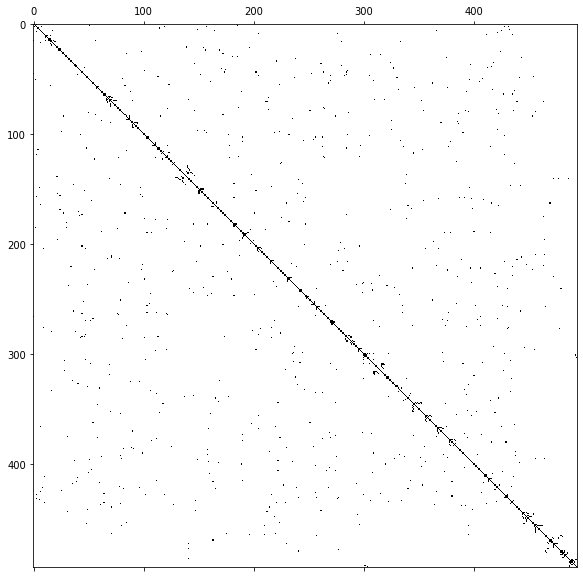

In [ ]:
mat = io.loadmat('bus494')
#print(mat)
A=mat['Problem']['A']
B=A[0]
C=B[0]
D=sp.csr_matrix.toarray(C)
print(type(D))
plt.figure(figsize=(10, 10))
plt.spy(D)
plt.show()

Observemos el efecto de la factorización LU en el patrón de dispersión.

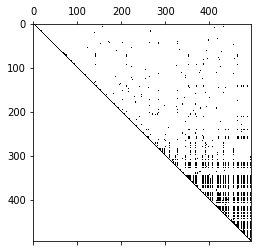

In [ ]:
p,l,u=la.lu(D)
plt.spy(u)

In [ ]:
print(np.linalg.cond(D))

2415411.0174664636


# Problemas


## Problema 1
Considere la matriz de segundas diferencias $A$ definida por
$$a_{ij}=\left\{\begin{array}{cl}
-2, & i=j,\\
1, & |j-i|=1,\\
0, & |j-i|>1.
\end{array} \right.$$
Considere tambien la matriz de Frank de dimension $n\times n$,
$$
A=\left(\begin{array}{cccccccccc}
n & n-1 & n-2 & n-3 & n-4& \dots 1\\
n-1 & n-1 &n-2 &n-3 & n-4 &\dots 1\\
0 & n-2 & n-2 & n-3 & n-4 & \dots 1\\
0&0&n-3 &n-3 & n-4&\dots 1 \\
\vdots& \ddots&\ddots &\ddots &\ddots &\dots
\end{array}\right)
$$

Note que en la diagonal principal, es decir, la diagonal 0 tenemos los números $n,n-1,\dots,1$, en la diagonal $1$ y $-1$ tenemos $n-1,n-2,\dots,1$. En la diagonal $k>1$ tenemos $n-k,n-k-1,\dots,1$ y en la diagonal $-k$ con $k>1$ tenemos entradas nulas. Esta matriz es un ejemplo de matriz de Hessenberg.



1.   Que propiedades puede listar de las matrices de segundas diferencias y de Frank
2.   Investigue como medir el tiempo de ejecución de un comando en python o MatLab y
calcule el tiempo de resolver un sistema  $Ax=b$ con $A$ una matriz de
 segundas diferencias de segundo orden de dimension $n=2,4,8,1,32,64,128,\dots$. Tome  $b=(1,1,\dots,1)^T.$
3. Repita con la matriz de Frank.
4. Repita con la matriz de Hilbert.



In [ ]:
A=np.array([[2,3,2],[3,2,1],[1,1,1],[1,1,1]])
b=np.shape(A)
for i in range(b[0]):
  for j in range(b[1]):
    B=A
    if i==j:
      B[i][j]=-2
    elif abs(j-i)==1:
      B[i][j]=1
    elif abs(j-i)>1:
      B[i][j]=0

print("\n",B)



 [[-2  1  0]
 [ 1 -2  1]
 [ 0  1 -2]
 [ 0  0  1]]


***Propiedades matriz segundas de diferencias***

Veamos que -$A$ obtenida a partir de $A$ (matriz de segundas diferencias) es definida positiva, esto lo haremos a partir de la definición. Sean $x\in \mathbb{R}^n \backslash \{0\}$ y A la matriz de segundas diferencias de tamaño $n\times m$ entonces

\begin{align*}
    x^T(-A)x&=-x^T(-A)x\\
            &=-\sum_{ij} x_i A_{ij}x_j\\
            &=2\sum_{i=1}^n x_i^2-\sum_{i=1}^n x_ix_j+0\\
            &=2\sum_{i=1}^n x_i^2-\left(\sum_{i=1}^{n-1} x_ix_{i+1}+\sum_{j=1}^{n-1} x_jx_{j+1}\right)\\
            &=2\sum_{i=1}^n x_i^2-2\left(\sum_{i=1}^{n-1} x_ix_{i+1}\right)\\
\end{align*}
Aplicando la desigualdad de Cauchy-Schwarz.
\begin{align*}
\sum_{i=1}^{n-1} x_ix_{i+1} &\leq \sqrt{x_1^2+\cdots x_{n-1}^2}\sqrt{x_1^2+\cdots x_{n}^2}\\
&< \sqrt{x_1^2+\cdots x_{n}^2}\sqrt{x_1^2+\cdots x_{n}^2}\\
&=x_1^2+\cdots x_{n}^2=\sum_{i=1}^n x_i^2
\end{align*}
De esta manera, $x^T(-A)x>0$.Las matrices definidas positivas son invertibles, por tanto esta lo es.
Vemos además que esta matriz simética y no es diadonal dominante pues en la segunda fila tendremos que $|-2|=|1|+|1|$.

**Propiedades matriz de Frank**
Estas matrices es un caso particular de las matrices de Hessenberg. Veamos que su determinante es igual a 1 para todo $n$. Es claro que para n=1, $det(A(n))=1$. Si sopunemos que $det(A(k))=1$ para todo $k\leq n $ tenemos que como $det(A(n+1)=(n+1)det(A(n))-ndet(A(n-1))=(n+1)-n=1$, por hipótesis de inducción. Esta matriz además es definida positiva(luego, invertible). No es diagonal dominante ni simétrica.



In [ ]:
from scipy.sparse import diags
diagonals = [[1, 2, 3, 4], [5, 2, 3], [1, 2,3]]
diags(diagonals, [0, -2, 1]).toarray()

array([[ 1.0000,  1.0000,  0.0000,  0.0000],
       [ 0.0000,  2.0000,  2.0000,  0.0000],
       [ 5.0000,  0.0000,  3.0000,  3.0000],
       [ 0.0000,  2.0000,  0.0000,  4.0000]])

In [ ]:
from timeit import default_timer
from scipy.sparse.construct import diags
n=[1,2,4,8,32,64,128]
t=[]
for i in n:
  print("Para n=",i)
  k=np.array([np.ones(i-1),-2*np.ones(i),np.ones(i-1)])
  offset=[-1,0,1]
  A=diags(k,offset).todense()
  print("A=\n",A,"\n")
  b=np.ones([i,1])
  "Ahora miremos cuál es el tiempo de resolver Ax=b."
  beginning= default_timer()
  x = la.solve(A, b)
  end= default_timer()
  print("El tiempo requerido para resolver el sistema es de aprox ",end-beginning," segundos")
  t.append(end-beginning)
  print("\n\n")

  n        t
  1 0.020012
  2 0.003275
  4 0.002592
  8 0.001628
 32 0.004745
 64 0.001295
128 0.003022 





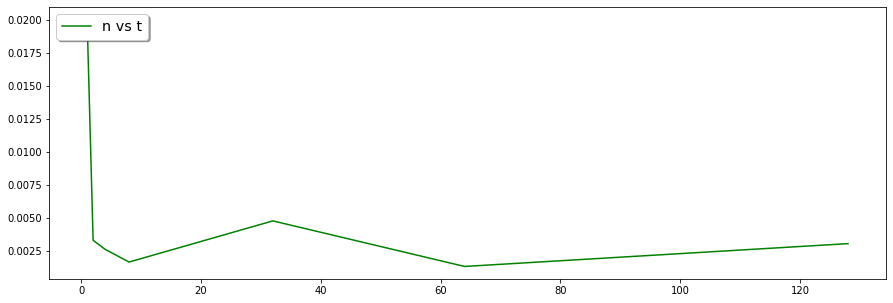

In [ ]:
import pandas as pd
data={'n':n,'t':t}
df=pd.DataFrame(data)
print(df.to_string(index=False),"\n"*3)
plt.figure(figsize=(15, 5))
plt.plot(n, t, 'g-',label='n vs t')
legend = plt.legend(loc='upper left', shadow=True, fontsize='x-large')
plt.show()

Al correr este último programa se observa que el tiempo de ejecución varía y que la curva "n vs t" no sigue ningún patrón.

3. Matriz de Frank

In [ ]:
t=[]
for i in n:
  print("Para n=",i)
  k=[]
  for j in range(0,i+1):
    dig=[]
    if j==0:
      for l in range(0,i-j-1):
        dig.append(i-l-1)
    if j==1:
      for l in range(0,i):
        dig.append(i-l)
    if j>1:
      for l in range(i-j+1,0,-1):
        dig.append(l)
    k.append(dig)
  "Asegurando que estoy haciendo las cosas bien."
  print(k,"\n")
  offset=[]
  for z in range(-1,i):
    offset.append(z)
  "Asegurando que estoy haciendo las cosas bien."
  print(offset,"\n")
  A=diags(k,offset).todense()
  print("A=\n",A,"\n")
  b=np.ones([i,1])
  "Ahora miremos cuál es el tiempo de resolver Ax=b."
  beginning= default_timer()
  x = la.solve(A, b)
  end= default_timer()
  print("El tiempo requerido para resolver el sistema es de aprox ",end-beginning," segundos")
  t.append(end-beginning)
  print("\n\n")



  n        t
  1 0.000152
  2 0.000084
  4 0.000082
  8 0.000110
 32 0.000318
 64 0.007143
128 0.009094 





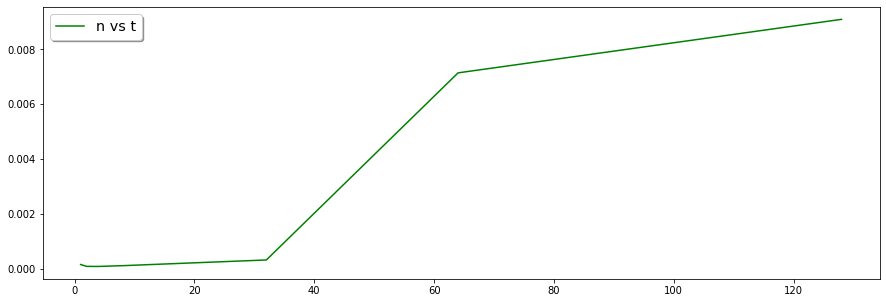

In [ ]:
data={'n':n,'t':t}
df=pd.DataFrame(data)
print(df.to_string(index=False),"\n"*3)
plt.figure(figsize=(15, 5))
plt.plot(n, t, 'g-',label='n vs t')
legend = plt.legend(loc='upper left', shadow=True, fontsize='x-large')
plt.show()

4. Matriz de Hilbert

In [ ]:
t=[]
for i in n:
  A=la.hilbert(i)
  print("A=\n",A,"\n")
  b=np.ones([i,1])
  "Ahora miremos cuál es el tiempo de resolver Ax=b."
  beginning= default_timer()
  x = la.solve(A, b)
  end= default_timer()
  print("El tiempo requerido para resolver el sistema es de aprox ",end-beginning," segundos")
  t.append(end-beginning)
  print("\n\n")

  n        t
  1 0.000408
  2 0.000160
  4 0.000138
  8 0.000136
 32 0.009286
 64 0.008097
128 0.008647 





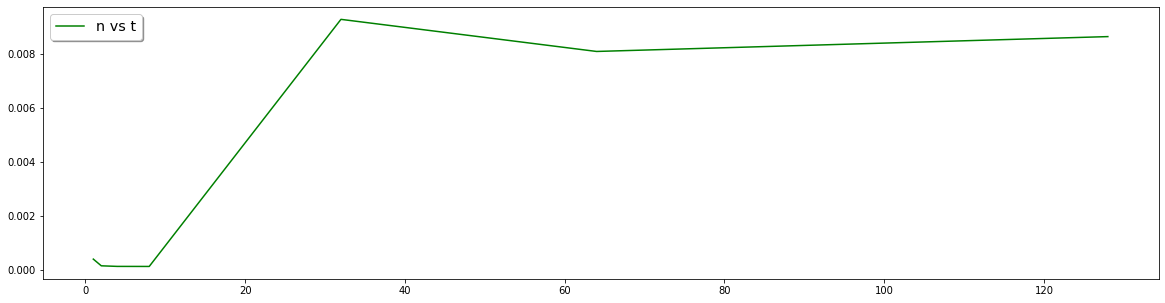

In [ ]:
data={'n':n,'t':t}
df=pd.DataFrame(data)
print(df.to_string(index=False),"\n"*3)
plt.figure(figsize=(20, 5))
plt.plot(n, t, 'g-',label='n vs t')
legend = plt.legend(loc='upper left', shadow=True, fontsize='x-large')
plt.show()

Explicaciones? Conclusiones?  Comentarios?


## Problema 2
Considere la matriz de Hilbert $H(n)$ con $n=4,5,6,\dots$.


1.   Para $n=5,6,7,\dots$ calcule $\lambda(n)$ el menor valor propio de $H(n)$. Grafique este vector.
2.   Al intentar hacer a factorización de Cholesky de $H(20)$ en Octave/Matlab/Python la factorización no se calcula llevando a la conclución de que la representación numérica de $H(20)$ no es definida positiva. En Octave parece el error
```
# error: chol : imput matrix must be positive definite
```
Verifique teoricamente  $H(n)$ es en realidad positiva definida (no necesita mostrar detalles aqui). Con ayuda del gráfico anterior y de lo estudiado sobre artimética de punto flotante explique esta situación.
3. Calcule $R(n)$ de la factorización de Cholesky de $H(n)=R(n)^TR(n)$ con $n=14,15,\dots,20$. Presente un gráfico de $t(n)=tr(R(n))$ como evidencia del cálculo.




**Pruebas**

In [ ]:
print(la.eig(la.hilbert(3)))
print(la.eig([[1,0],[0,1]]))



(array([1.40831893+0.j, 0.12232707+0.j, 0.00268734+0.j]), array([[ 0.8270,  0.5474,  0.1277],
       [ 0.4599, -0.5283, -0.7137],
       [ 0.3233, -0.6490,  0.6887]]))
(array([1.+0.j, 1.+0.j]), array([[ 1.0000,  0.0000],
       [ 0.0000,  1.0000]]))


**Solucion**
1.


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


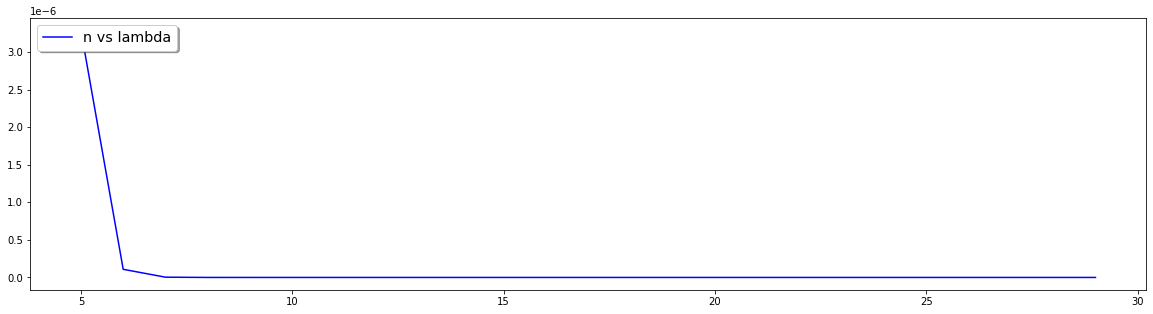

In [ ]:
def ein(n):
  if n<5:
    print("Entrada no valida, ingrese n mayor o igual a 5 ")
  else:
    return min(la.eigvals(la.hilbert(n)))
x=[]
y=[]
for i in range(5,30):
  x.append(i)
  y.append(ein(i))
plt.figure(figsize=(20, 5))
plt.plot(x, y, 'b-',label='n vs lambda')
legend = plt.legend(loc='upper left', shadow=True, fontsize='x-large')
plt.show()


2.
https://mchouza.wordpress.com/2015/04/29/hilbert-matrices-are-positive-definite/ Un compañero me facilito este link en el cuàl se demuestra que esta matriz es definida positiva. Escribirè algunos detalles de la prueba para interiorizar mejor este resultado.
Dado que $H_{ij}=\frac{1}{i+j-1}=\int_{0}^1 x^{i+j-2}dx$. Tenemos que para todo $\in \mathbb{R}^n $
\begin{align*}
z^THz &=\sum_{ij} z_{i}H_{ij}z_j\\
&=\sum_{ij} z_{i}\left(\int_{0}^1 x^{i+j-2}dx\right)z_j\\
&=\int_{0}^1\sum_{ij} z_i x^{i+j-2} z_j dx\\
&=\int_{0}^1\sum_{ij} z_i x^{i-1} z_j x^{j-1} dx
\end{align*}
Por otra parte desarrollando esta suma podemos ver que:
\begin{align*}
\sum_{ij} z_i x^{i-1} z_j x^{j-1}=\left(\sum_{i} z_i x^{i-1}\right) \left(\sum_{j} z_j x^{j-1} \right)=p^2(x)
\end{align*}
Con $p(x)$ un polinomio en $\mathbb{R[x]}$. Asì, $z^THz>0$, teniendo en cuenta que $p(x)\neq 0$.
Por otra parte, sabemos que esta matriz es mal condicionada y esto puede ser visualizado en la gràfica del vector $\lambda(n)$, dado que a partir de $n≈8$ estos valores tienden a ser 0.

3.
Como ya vimos, $H(n)$ no es definida positiva para Python para $n\geq 14$. Entonces realizaremos el càlculo con un $\epsilon>0$ para corregir este error.

[1.0, 1.2886751345948129, 1.3632107338448056, 1.3821089574952679, 1.3868708622571797, 1.388067335846778, 1.3883674982905665, 1.3884427310691807, 1.3884615761509587, 1.3884662951388256, 1.3884674789432396, 1.388467784750963, 1.3884678538704711, 1.390828424252764, 1.3910367692573264, 1.391234774514977, 1.3914244588287434, 1.3916073049555797, 1.3917843445651807, 1.3919563069019931, 1.3921237494025414, 1.3922871399905352, 1.3924468957592935, 1.392603395035305, 1.3927569779566318, 1.3929079446584758, 1.3930565550401446, 1.3932030310319643, 1.3933475608549097, 1.3934903043151685, 1.393631398230149, 1.3937709613431026, 1.3939090983886413, 1.39404590321222, 1.3941814610251322, 1.3943158499470036, 1.3944491420241885, 1.3945814038894406, 1.3947126972005026]


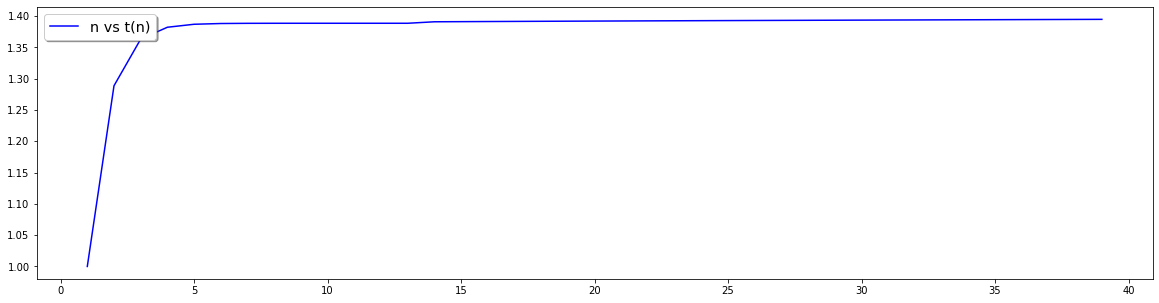

In [ ]:
epsilon=1/100000000
trazas=[]
y=[]
for i in range(1,40):
  if i>13:
    r=la.cholesky(la.hilbert(i)+epsilon*np.identity(i))
    trazas.append(np.trace(r))
    y.append(i)
  else:
    r=la.cholesky(la.hilbert(i))
    trazas.append(np.trace(r))
    y.append(i)
plt.figure(figsize=(20, 5))
plt.plot(y, trazas, 'b-',label='n vs t(n)')
legend = plt.legend(loc='upper left', shadow=True, fontsize='x-large')
plt.show()

## Problema 3
Considere la matriz de Hilbert $H(n)$ con $n=4,5,\dots,20$. Existe una fórmula exacta para la inversa de $H(n)$, implemente esta fórmula. Con el comando de MatLab o Python para calcular la inversa calcule $G=inv(H(n))$. Compare y comente los resultados.
$$H_{ij}^{-1}(n)=(-1)^{i+j}(i+j-1) {n+i-1\choose n-j}{n+j-1\choose n-i}{i+j-2\choose i-1}^2.$$




In [ ]:
from scipy.special import comb
l=[]
residuos=[]
for i in range(4,21):
  print("Para n=",i,"\n")
  invH=[]
  for j in range(1,i+1):
    filaj=[]
    for z in range(1,i+1):
      compjz=((-1)**(j+z)) * (j+z-1) * comb(i+j-1,i-z) * comb(i+z-1,i-j) * (comb(j+z-2,j-1)**2)
      filaj.append(compjz)
    invH.append(filaj)
  A=np.array(invH)
  B=np.linalg.inv(la.hilbert(i))
  print("Por formula H(n)=\n",A,"\n"*2)
  print("Por comando de python:\n",B,"\n"*2)
  r=A-B
  residuos.append(la.norm(r))
  l.append(i)
  print("Residuo r=\n",r,"\n"*2)
  print("\n"*5)

Comparemos la difencia entre los resultados obtenidos por los dos métodos y el tamaño de $n$.

 n          dif
 4 6.718697e-10
 5 2.044454e-06
 6 1.200668e-03
 7 8.908986e-01
 8 3.424591e+02
 9 6.610957e+05
10 1.526902e+08
11 1.988876e+11
12 3.250193e+14
13 1.281891e+17
14 1.034932e+19
15 3.315520e+20
16 1.087276e+22
17 3.575630e+23
18 1.178219e+25
19 3.889186e+26
20 1.285784e+28 





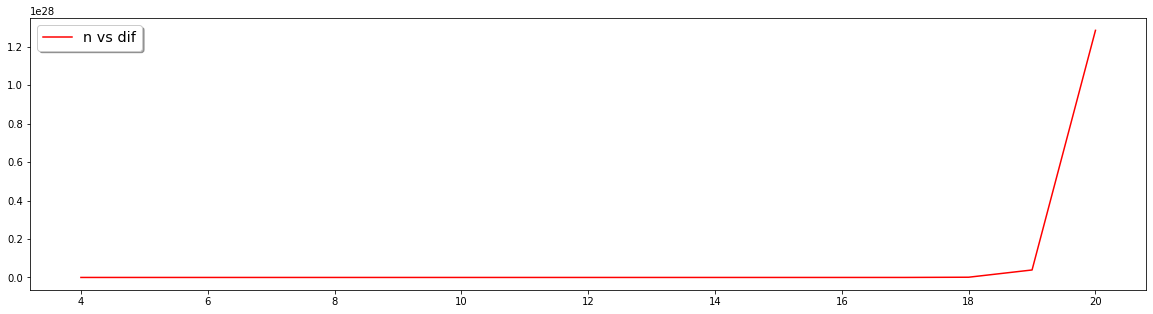

In [ ]:
data={'n':l,'dif':residuos}
df=pd.DataFrame(data)
print(df.to_string(index=False),"\n"*3)
plt.figure(figsize=(20, 5))
plt.plot(l, residuos, 'r-',label='n vs dif')
legend = plt.legend(loc='upper left', shadow=True, fontsize='x-large')
plt.show()

Vemos que a medida que $n\longrightarrow \infty$ tenemos que $||r||\longrightarrow \infty$. A pesar de que para $n\leq 18$ no hay una diferencia perceptible entre los resultados obtenidos,

## Problema 4
Considere la matriz en https://suitesparse-collection-website.herokuapp.com/Sandia/oscil_dcop_21. El archivo .mat puede ser recuperado de
https://suitesparse-collection-website.herokuapp.com/mat/Sandia/oscil_dcop_21.mat .
Gráfique el patrón de dispersión de esta matriz. Liste (con justificación numérica) las propiedades de esta matriz.

In [ ]:
url = "https://suitesparse-collection-website.herokuapp.com/mat/Sandia/oscil_dcop_21.mat"
file = requests.get(url, allow_redirects=True)
print(file.content)
open('bus494.mat', 'wb').write(file.content)

b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sat Sep  6 06:04:50 2008                                                \x00\x01IM\x0f\x00\x00\x00y*\x00\x00x\x9c\x84\x99\x0b\xb8VS\x1a\xc7\xf7\xee\xa6\xd2U\xa2P\x1d%\xe5VB.%\x12E\xe8BR\x86\xd4\xe9\x9c\xd4W\xa7sr:%\x89\xa2D\xe9&)\x92\xa2\x9b\xcae\x92\xdc\x92\xd0\xb8F42\rM\x93\x98$1\xa69\x19C.3\xbf\xbf\xf5\xae\xe7[\xcfz\xbey\xa6\xc7\xefY\xeb\xbf\xf7w\xd6\xde\xfb]k\xbd\xef\x7fo\xb5\x92$9u@\x92T\xa1\xad\n\x15\x12\xf7\xaf\xb2\xe94\xe0\x10\xe8YZ2\xb0h\xd0p\xceW\xfaM\xebx\x17(\xce\x1f>\x88\xa6,SVD{\x81\x1bd\xa0k2\x85\xbf5\xc32\xc5\xea\x14\x97\x94\r\x1a\x99$\x85\xf9e\xfa\x83\xfcQeCJJ\x93A\x85v\xddZpI\x92\xbd\x9fJ9\xee\xe7pk\xf5\xaf\x8e\xe9^\xf9\xc5\x85\x99\xfc\xd6%#\x0b2E\xfd\x0b\x0bJF\xf4?\xad\x8d\x1fo\xcc\xff\x19\xef\xa2h\xbc\x8b\xfe\xc7xy\x05\x99\xd2\x82Q\x99\xb2\xbc\x91\x99\xe1\xa3\x8a\xf2\xcb2%\xc5y\xc3\xf3\xcbJ3cZ\xe5\xb9\xdf\xe7u\xff\xedh~Q\xde\xe5\xf9\x03[\xf9\xeb\x0f\xe8\x91\xbd~e.P\xb5J\xf6\xfaO\xa5\x8e4\xb8\xaf\xbc\x06\xae_\xc5\

11009

<class 'numpy.ndarray'>


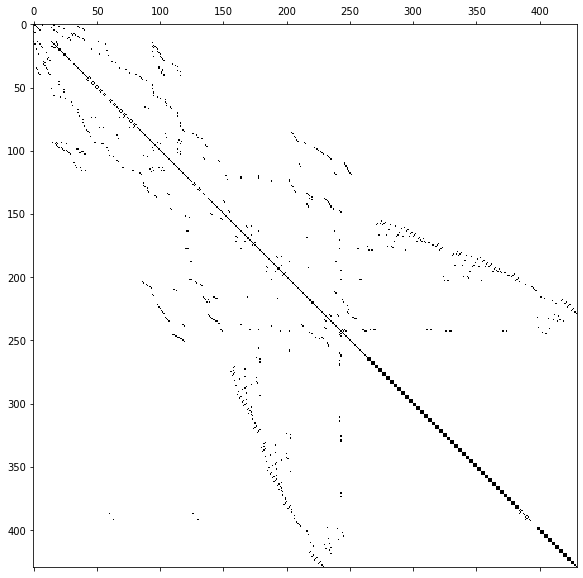

In [ ]:
mat = io.loadmat('bus494')
#print(mat)
A=mat['Problem']['A']
B=A[0]
C=B[0]
D=sp.csr_matrix.toarray(C)
print(type(D))
plt.figure(figsize=(10, 10))
plt.spy(D)
plt.show()

# Problema 5
Considere la matriz en https://suitesparse-collection-website.herokuapp.com/Sandia/oscil_dcop_21. Use un método iterativo (diferente de Jacobi) para resolver el sistema $Ax=b$
con $b=(1,1,\dots,1)$.

In [ ]:
from scipy.sparse.linalg import spsolve
def GaussSeidelsolver(A,b,tol,Maxiter=25,x=None):
    # x inicial en caso no se tenga
    if x is None:
        x = np.zeros(len(A[0]))
    #A=D-L-U y R=A-D+L=-U;
    Q= np.tril(A)

    #Interation
    for i in range(Maxiter):
        r=b-np.dot(A,x)
        nr=la.norm(r)
        print('norm(r(',i,'))=',nr)
        if nr<tol:
          break
        delta= spsolve(Q,r)
        x = x+delta
    return x
A = D
b = b=np.ones([1624,1])
guess=b
sol = GaussSeidelsolver(A,b,0.00001,Maxiter=100,x=guess)

print("A:")
print(A)

print("b:")
print(b)

print ("x:")
print(sol)

ValueError: ignored

**Comentarios:** No me fue posible solucionar este error. Agradecería bastante una corrección.

## Problema 6
Considere la matriz https://suitesparse-collection-website.herokuapp.com/Sybrandt/AGATHA_2015.  Que puede decir del problema asociado a esta matriz?

Ante los riegos de fracaso y altos costos de operacion que conllevan las investigaciones médicas, los sistemas de generación de hipótesis permiten afrontar esta dificultad. Agatha es un sistema de generación de hipótesis basado en deep learning que recolecta información de toda la información de estudios biomedicos existentes y y construye un grafo que relaciona relaciona datos coincidentes en dichos papers. Este grafo contiene 183,964,077 nodos y 11,588,725,964 aristas. La matriz asociada a dicho grafo es la que está en el enunciado del problema.